In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/ML project/main cpp.csv')

In [7]:
print(df.head())

                         State                  District      Crop     Year  \
0  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2001-02   
1  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2002-03   
2  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2003-04   
3  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut  2001-02   
4  Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut  2002-03   

       Season    Area Area Units  Production Production Units     Yield  
0      Kharif  1254.0    Hectare      2061.0           Tonnes  1.643541  
1  Whole Year  1258.0    Hectare      2083.0           Tonnes  1.655803  
2  Whole Year  1261.0    Hectare      1525.0           Tonnes  1.209358  
3      Kharif  3100.0    Hectare      5239.0           Tonnes  1.690000  
4  Whole Year  3105.0    Hectare      5267.0           Tonnes  1.696296  


In [8]:
print(df.tail())

            State        District    Crop     Year      Season    Area  \
2550  West Bengal          MALDAH  Barley  1999-00        Rabi  2339.0   
2551  West Bengal          MALDAH  Barley  2000-01        Rabi  2199.0   
2552  West Bengal  MEDINIPUR WEST  Barley  1997-98  Whole Year     1.0   
2553  West Bengal     MURSHIDABAD  Barley  1997-98  Whole Year  1860.0   
2554  West Bengal     MURSHIDABAD  Barley  1998-99        Rabi  1661.0   

     Area Units  Production Production Units     Yield  
2550    Hectare         NaN           Tonnes       NaN  
2551    Hectare         NaN           Tonnes  0.536608  
2552    Hectare         NaN           Tonnes       NaN  
2553    Hectare         NaN           Tonnes  1.064516  
2554    Hectare      2340.0           Tonnes  1.408790  


In [9]:
df.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             2555 non-null   object 
 1   District          2555 non-null   object 
 2   Crop              2555 non-null   object 
 3   Year              2555 non-null   object 
 4   Season            2555 non-null   object 
 5   Area              2543 non-null   float64
 6   Area Units        2555 non-null   object 
 7   Production        1953 non-null   float64
 8   Production Units  2555 non-null   object 
 9   Yield             2500 non-null   float64
dtypes: float64(3), object(7)
memory usage: 199.7+ KB
None


In [11]:
print(df.describe())

                Area    Production        Yield
count    2543.000000  1.953000e+03  2500.000000
mean     8870.250275  2.044291e+05    52.394949
std     27396.988192  2.846107e+06   523.497290
min         1.000000  0.000000e+00     0.000000
25%       121.000000  8.000000e+01     0.511628
50%       762.000000  5.900000e+02     0.894725
75%      4813.500000  5.100000e+03     1.745132
max    413835.100000  6.858000e+07  8372.163389


In [12]:
print(df.isnull().sum())

State                 0
District              0
Crop                  0
Year                  0
Season                0
Area                 12
Area Units            0
Production          602
Production Units      0
Yield                55
dtype: int64


In [13]:
df_cleaned = df.dropna(subset=['Area', 'Yield']).copy()
df_cleaned.loc[:, 'Production'].fillna(df_cleaned['Production'].mean(), inplace=True)
print(df_cleaned.isnull().sum())

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64


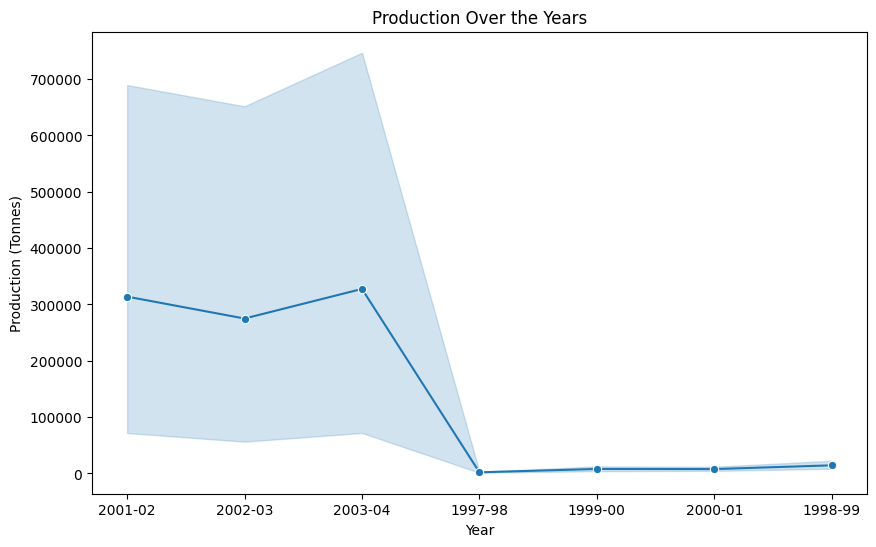

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Production', data=df, marker='o')
plt.title('Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (Tonnes)')
plt.show()


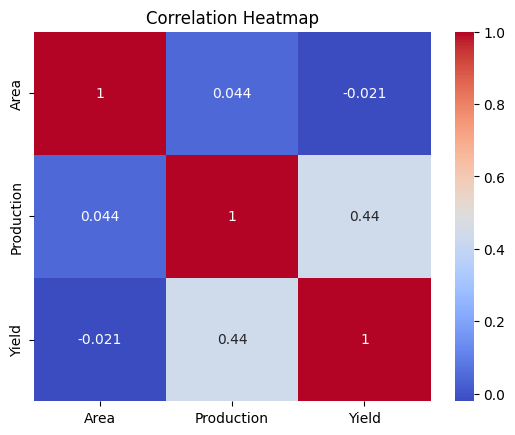

In [15]:
correlation_matrix = df[['Area', 'Production', 'Yield']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


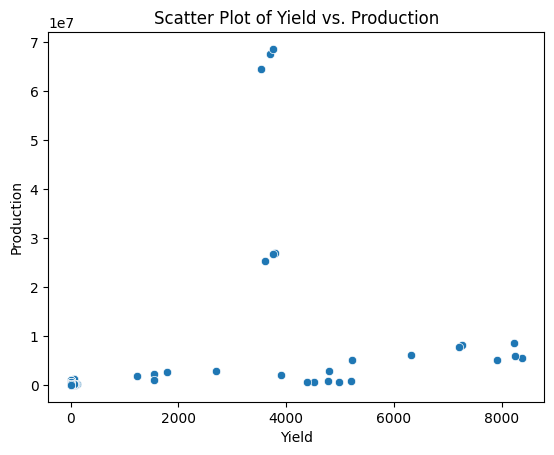

In [16]:
sns.scatterplot(x='Yield', y='Production', data=df_cleaned)
plt.title('Scatter Plot of Yield vs. Production')
plt.show()

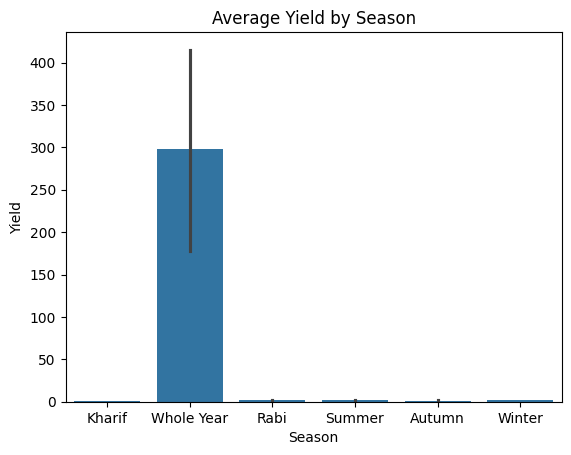

In [17]:
sns.barplot(x='Season', y='Yield', data=df_cleaned)
plt.title('Average Yield by Season')
plt.show()

In [18]:
# Convert "Year" to string type
df_cleaned['Year'] = df_cleaned['Year'].astype(str)

# Split "Year" values by the "-" character and extract the first part
df_cleaned['Year'] = df_cleaned['Year'].str.split('-').str[0]

# Convert to numeric format
df_cleaned['Year'] = pd.to_numeric(df_cleaned['Year'], errors='coerce')

# Remove the original categorical columns before one-hot encoding
categorical_columns = ['State', 'District', 'Crop', 'Season', 'Area Units', 'Production Units']
df_encoded = pd.get_dummies(df_cleaned.drop(columns=categorical_columns), drop_first=True)

# Concatenate the one-hot encoded DataFrame with the original categorical columns
df_final = pd.concat([df_encoded, df_cleaned[categorical_columns]], axis=1)

# Check for any remaining non-numeric columns
non_numeric_columns = df_final.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['State', 'District', 'Crop', 'Season', 'Area Units',
       'Production Units'],
      dtype='object')


In [19]:
df_final

,Year,Area,Production,Yield,State,District,Crop,Season,Area Units,Production Units
0,2001,1254.0,2061.000000,1.643541,Andaman and Nicobar Islands,NICOBARS,Arecanut,Kharif,Hectare,Tonnes
1,2002,1258.0,2083.000000,1.655803,Andaman and Nicobar Islands,NICOBARS,Arecanut,Whole Year,Hectare,Tonnes
2,2003,1261.0,1525.000000,1.209358,Andaman and Nicobar Islands,NICOBARS,Arecanut,Whole Year,Hectare,Tonnes
3,2001,3100.0,5239.000000,1.690000,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,Kharif,Hectare,Tonnes
4,2002,3105.0,5267.000000,1.696296,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,Whole Year,Hectare,Tonnes
...,...,...,...,...,...,...,...,...,...,...
2546,1998,833.0,206838.963369,0.804322,West Bengal,JALPAIGURI,Barley,Rabi,Hectare,Tonnes
2547,1999,813.0,206838.963369,0.998770,West Bengal,JALPAIGURI,Barley,Rabi,Hectare,Tonnes
2551,2000,2199.0,206838.963369,0.536608,West Bengal,MALDAH,Barley,Rabi,Hectare,Tonnes
2553,1997,1860.0,206838.963369,1.064516,West Bengal,MURSHIDABAD,Barley,Whole Year,Hectare,Tonnes


In [20]:
remaining_categorical_columns = df_final.select_dtypes(include=['object']).columns

# Perform one-hot encoding on remaining categorical columns
df_final_encoded = pd.get_dummies(df_final, columns=remaining_categorical_columns, drop_first=True)

non_numeric_columns_final = df_final_encoded.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns after one-hot encoding:", non_numeric_columns_final)




Non-numeric columns after one-hot encoding: Index(['State_Andhra Pradesh', 'State_Andhra pradesh',
       'State_Arunachal Pradesh', 'State_Assam', 'State_Bihar',
       'State_Chandigarh', 'State_Chhattisgarh', 'State_Goa', 'State_Gujarat',
       'State_Haryana',
       ...
       'Crop_Urad', 'Crop_Wheat', 'Crop_other oilseeds', 'Season_Kharif',
       'Season_Rabi', 'Season_Summer', 'Season_Whole Year', 'Season_Winter',
       'Production Units_Nuts', 'Production Units_Tonnes'],
      dtype='object', length=484)


In [ ]:
df_final_encoded

,Year,Area,Production,Yield,State_Andhra Pradesh,State_Andhra pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,...,Crop_Urad,Crop_Wheat,Crop_other oilseeds,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Production Units_Nuts,Production Units_Tonnes
0,2001,1254.0,2061.000000,1.643541,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2002,1258.0,2083.000000,1.655803,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2003,1261.0,1525.000000,1.209358,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2001,3100.0,5239.000000,1.690000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2002,3105.0,5267.000000,1.696296,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,1998,833.0,206838.963369,0.804322,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2547,1999,813.0,206838.963369,0.998770,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2551,2000,2199.0,206838.963369,0.536608,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2553,1997,1860.0,206838.963369,1.064516,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [21]:
#outliers
from scipy import stats
numerical_columns = ['Area', 'Production', 'Yield']
z_scores = stats.zscore(df_final_encoded[numerical_columns])

# Defining a threshold for z-score, commonly ±3
threshold = 3

# Creating a mask for outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Removing outliers from the dataset
new_df = df_final_encoded[~outlier_mask]

In [22]:
new_df

,Year,Area,Production,Yield,State_Andhra Pradesh,State_Andhra pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,...,Crop_Urad,Crop_Wheat,Crop_other oilseeds,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Production Units_Nuts,Production Units_Tonnes
0,2001,1254.0,2061.000000,1.643541,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2002,1258.0,2083.000000,1.655803,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2003,1261.0,1525.000000,1.209358,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2001,3100.0,5239.000000,1.690000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2002,3105.0,5267.000000,1.696296,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,1998,833.0,206838.963369,0.804322,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2547,1999,813.0,206838.963369,0.998770,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2551,2000,2199.0,206838.963369,0.536608,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2553,1997,1860.0,206838.963369,1.064516,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [23]:
# Check if outliers are removed
original_rows = df_cleaned.shape[0]
cleaned_rows = new_df.shape[0]

if cleaned_rows < original_rows:
    print("Outliers have been removed.")
    print("Number of outliers removed:", original_rows - cleaned_rows)
else:
    print("No outliers were removed.")

Outliers have been removed.
Number of outliers removed: 71


In [24]:
# Split the dataset into features (x) and target (y)
x = new_df.drop(columns=['Production'])  # Features (all columns except 'Production')
y = new_df['Production']

In [25]:
#Training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
print("Shapes of training and testing sets:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

Shapes of training and testing sets:
x_train: (1936, 487)
y_train: (1936,)
x_test: (485, 487)
y_test: (485,)


In [27]:
y_test.dtypes

dtype('float64')

In [36]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

def train_evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

for name, model in models.items():
    mse, r2 = train_evaluate_model(model, x_train, y_train, x_test, y_test)
    print(f"{name} - MSE: {mse}, R2 Score: {r2}")


Linear Regression - MSE: 3688334481.9622035, R2 Score: 0.6442948938892129


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.133e+12, tolerance: 2.712e+09
  model = cd_fast.enet_coordinate_descent(


Lasso - MSE: 3475584201.9535694, R2 Score: 0.6648126536790764
Ridge - MSE: 3269135902.750685, R2 Score: 0.6847226468029337
KNeighbors Regressor - MSE: 10048656214.678452, R2 Score: 0.03090179521585823
Decision Tree Regressor - MSE: 1390614252.007567, R2 Score: 0.8658883589629404


In [29]:
x_train.shape

(1936, 487)

In [30]:
# Define the selected features
selected_features = ['Year', 'Area', 'Crop_Rice', 'Crop_Wheat', 'Crop_Maize', 'Crop_Sugarcane',
                     'Crop_Potato', 'Crop_Coconut', 'Season_Rabi', 'Season_Kharif',
                     'Season_Summer', 'Season_Whole Year', 'Yield']

# Reduce the training dataset to the selected features
x_train_reduced = x_train[selected_features]

# Check the shape of the reduced training dataset
print("Shape of reduced training dataset:", x_train_reduced.shape)

Shape of reduced training dataset: (1936, 13)


In [31]:
x_test.shape

(485, 487)

In [32]:
x_test_reduced = x_test[selected_features]

# Check the shape of the reduced training dataset
print("Shape of reduced testing dataset:", x_test_reduced.shape)

Shape of reduced testing dataset: (485, 13)


In [33]:
#select model
dtr = DecisionTreeRegressor()
dtr.fit(x_train_reduced,y_train)
dtr.predict(x_test_reduced)

array([1.40000000e+04, 2.06838963e+05, 7.92930000e+04, 1.59800000e+03,
       5.00000000e+00, 2.06838963e+05, 6.80000000e+01, 4.46200000e+03,
       2.60000000e+02, 1.10000000e+01, 1.22000000e+02, 1.46000000e+02,
       2.20000000e+01, 1.64000000e+02, 0.00000000e+00, 2.96000000e+02,
       4.00000000e+03, 4.20000000e+02, 3.88000000e+02, 1.02500000e+02,
       1.48300000e+03, 8.85300000e+03, 2.06838963e+05, 7.15600000e+03,
       1.50000000e+02, 2.06838963e+05, 3.56000000e+02, 2.00000000e+00,
       8.40000000e+02, 1.72500000e+03, 4.22600000e+03, 1.40000000e+02,
       2.50000000e+03, 4.30000000e+02, 2.00000000e+01, 2.00000000e+00,
       2.10000000e+02, 2.06838963e+05, 2.06838963e+05, 3.76300000e+03,
       1.13940000e+04, 4.29000000e+02, 4.74520000e+04, 5.00000000e+00,
       5.00000000e+01, 1.00000000e+02, 1.15600000e+03, 2.06838963e+05,
       2.00000000e+00, 2.10000000e+02, 1.20000000e+04, 2.11800000e+04,
       1.41200000e+04, 1.03469482e+05, 1.17326000e+05, 4.88100000e+04,
      

In [34]:
0import numpy as np

# Collect input from the user
year = int(input("Enter the year: "))
area = float(input("Enter the area: "))
crop_rice = int(input("Enter the crop_Rice (0 for False, 1 for True): "))
crop_wheat = int(input("Enter the crop_Wheat (0 for False, 1 for True): "))
crop_maize = int(input("Enter the crop_Maize (0 for False, 1 for True): "))
crop_sugarcane = int(input("Enter the crop_Sugarcane (0 for False, 1 for True): "))
crop_potato = int(input("Enter the crop_Potato (0 for False, 1 for True): "))
crop_coconut = int(input("Enter the crop_Coconut (0 for False, 1 for True): "))
season_rabi = int(input("Enter the season_Rabi (0 for False, 1 for True): "))
season_kharif = int(input("Enter the season_Kharif (0 for False, 1 for True): "))
season_summer = int(input("Enter the season_Summer (0 for False, 1 for True): "))
season_whole_year = int(input("Enter the season_Whole Year (0 for False, 1 for True): "))
yield_value = float(input("Enter the yield: "))

input_features = np.array([[year, area, crop_rice, crop_wheat, crop_maize, crop_sugarcane,
                             crop_potato, crop_coconut, season_rabi, season_kharif,
                             season_summer, season_whole_year, yield_value]])

# Make prediction
predicted_yield = dtr.predict(input_features)

print("Predicted crop yield:", predicted_yield)

Enter the year: 2004
Enter the area: 5000
Enter the crop_Rice (0 for False, 1 for True): 1
Enter the crop_Wheat (0 for False, 1 for True): 0
Enter the crop_Maize (0 for False, 1 for True): 0
Enter the crop_Sugarcane (0 for False, 1 for True): 0
Enter the crop_Potato (0 for False, 1 for True): 0
Enter the crop_Coconut (0 for False, 1 for True): 0
Enter the season_Rabi (0 for False, 1 for True): 1
Enter the season_Kharif (0 for False, 1 for True): 0
Enter the season_Summer (0 for False, 1 for True): 0
Enter the season_Whole Year (0 for False, 1 for True): 0
Enter the yield: 4.5
Predicted crop yield: [8853.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [35]:
import pickle
pickle.dump(dtr,open("model.pkl","wb"))